In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read data file and print
f = '../data/han_wang_gal4_temperature.xlsx'
df = pd.read_excel(f)
df

,sc15,sc20,sc25,sk15,sk20,sk25,m315,m320,m325
0,1298.5470,2737.135,16499.300,8978.031,14251.97,16593.960,20722.620,11703.010,17073.800
1,6798.1460,12185.360,12672.190,11221.130,13616.94,6910.673,10373.520,17025.580,15379.370
2,10686.9100,1532.901,15832.530,9460.200,17474.90,20934.660,21707.120,17499.830,16991.490
3,2018.8640,2357.752,15065.030,9049.072,16042.57,18042.750,21750.270,15657.500,13393.350
4,1551.3960,1888.596,16960.670,14132.810,12867.40,23189.560,20820.260,11383.330,7709.297
5,1682.3060,5757.599,13609.090,13359.270,16677.19,20526.220,7395.207,8404.338,13274.080
6,5801.6910,3796.529,15602.730,13160.890,13344.14,19782.510,22510.410,10261.600,13168.060
7,3485.5570,4758.537,12163.930,11233.410,18016.01,21371.720,11121.240,10938.800,14285.940
8,5701.0430,11756.490,13334.830,8949.010,13734.49,18062.910,31089.680,19347.140,12071.330
9,2584.7330,1526.974,14128.310,12566.750,15299.76,19314.240,24028.750,14456.700,12538.900


In [10]:
#We first melt so that we have species and temps as one column and the numerical values as the other
df_gt = pd.melt(df, var_name='Species and temps', value_name='Values')
df_gt
#speciesTemps is the first column of the species and temps
speciesTemps = df_gt['Species and temps'].tolist()
species = []
temps = []
#values is the numerical data
values = df_gt['Values'].tolist()
#This for loop below parses data in the 'species and temps' column. For example if the data is 'sc15', it will append 'sc' to
#species and '15' to temps
for j in speciesTemps:
    species.append(j[:2])
    temps.append(j[2:])
df_gt
type(df_gt['Species and temps'])

pandas.core.series.Series

In [4]:
#Create new column and import the numerical data into this column
df_gt["Fluorescence"] = values
#The "values" column was the second column, so we replace that with the list of temperatures
df_gt["Values"] = temps
#Make first column the species
df_gt["Species and temps"] = species
#Rename the three columns for final table which should be tidy
df_gt.columns = ['Gene Expression System', 'Temperature ($^\circ$C)', 'Fluorescence']
df_gt

,Gene Expression System,Temperature ($^\circ$C),Fluorescence
0,sc,15,1298.5470
1,sc,15,6798.1460
2,sc,15,10686.9100
3,sc,15,2018.8640
4,sc,15,1551.3960
5,sc,15,1682.3060
6,sc,15,5801.6910
7,sc,15,3485.5570
8,sc,15,5701.0430
9,sc,15,2584.7330


In [5]:
df_gt.dropna()

,Gene Expression System,Temperature ($^\circ$C),Fluorescence
0,sc,15,1298.5470
1,sc,15,6798.1460
2,sc,15,10686.9100
3,sc,15,2018.8640
4,sc,15,1551.3960
5,sc,15,1682.3060
6,sc,15,5801.6910
7,sc,15,3485.5570
8,sc,15,5701.0430
9,sc,15,2584.7330


This is the final tidy data frame after organizing all the data based on the three main variables (species, temperature, and values).

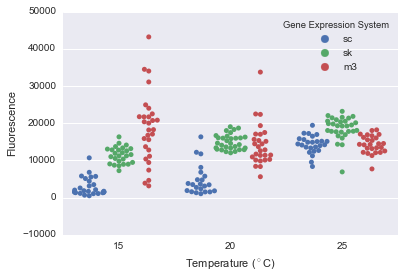

In [7]:
sns.swarmplot(x="Temperature ($^\circ$C)", y='Fluorescence', hue='Gene Expression System', data=df_gt, split=True)

We decided to use a swarmplot to plot all the data because each gene expression system had few enough points to be able to plot each individual datapoint without clustering the graph too much to the point where variability of the data cannot be seen. This swarmplot with the split parameter allows us to compare gene expression systems at each temperature side by side which does not compromise the aesthetics that would be lost when the three gene expression systems are strictly overlaid over one another. 

From the data, we can see that the SK performed better than the SC at lower temperatures (15 degrees C and 20 degrees C) and slightly better at 25 degrees C. Compared to the control, the SK seems to have less variability at lower temperatures as well.